# Portfolio Optimization

This notebook goes through several portfolio optimization strategies
- equal weighted (benchmark)
- maximum sharpe ratio
- minimum variance
- black-litterman

For securities, the original 9 sector SPDR etfs will be used see **[SPDR Website](https://www.sectorspdr.com/sectorspdr/?gclid=CjwKCAiAiML-BRAAEiwAuWVggskhTJmkJ4oPcj5558SzNWIx19yCPAlXT41Xdr9y2_HZD3ezypxMVRoC54oQAvD_BwE)** for more information

In [1]:
import math
import pandas as pd
import numpy as np
from numpy import linalg as LA
import statsmodels
from statsmodels.compat.python import range
from scipy.stats import norm
from math import sqrt
import sklearn as sk
from sklearn import covariance
import pandas_datareader.data as web
import matplotlib.pyplot as plt

In [2]:
#Import relevant libraries

#Fetch data from yahoo and save under DataFrame named 'data'
stock = ['XLY', 'XLP', 'XLE', 'XLF', 'XLV', 'XLI', 'XLB', 'XLK','XLU']
data = web.DataReader(stock,data_source="yahoo",start='12/01/2008',end='12/31/2019')['Adj Close']
#Arrange the data in ascending order
data = data.sort_index(ascending=1)

weights = [1/len(data.columns)]*len(data.columns)

print(data.head())


Symbols           XLB        XLE       XLF        XLI        XLK        XLP  \
Date                                                                          
2008-12-01  16.147114  31.700207  5.240936  16.403225  11.641677  16.365948   
2008-12-02  16.771959  32.772640  5.668158  17.161142  12.053046  16.603447   
2008-12-03  16.741482  32.793819  5.961255  17.455015  12.398592  16.804962   
2008-12-04  16.406189  30.521940  5.896674  17.106997  11.896724  16.589048   
2008-12-05  16.711004  31.156944  6.363638  17.524618  12.365684  17.056860   

Symbols           XLU        XLV        XLY  
Date                                         
2008-12-01  17.962532  19.064404  15.626668  
2008-12-02  18.428841  19.556341  16.353682  
2008-12-03  18.748228  20.024082  16.938644  
2008-12-04  18.071121  19.645058  17.122482  
2008-12-05  18.186098  20.314402  17.623873  


In [3]:
#Compute stock returns and print the returns in percentage format
returns = data.pct_change()
print (returns.head())

Symbols          XLB       XLE       XLF       XLI       XLK       XLP  \
Date                                                                     
2008-12-01       NaN       NaN       NaN       NaN       NaN       NaN   
2008-12-02  0.038697  0.033830  0.081516  0.046205  0.035336  0.014512   
2008-12-03 -0.001817  0.000646  0.051709  0.017124  0.028669  0.012137   
2008-12-04 -0.020028 -0.069278 -0.010833 -0.019938 -0.040478 -0.012848   
2008-12-05  0.018579  0.020805  0.079191  0.024412  0.039419  0.028200   

Symbols          XLU       XLV       XLY  
Date                                      
2008-12-01       NaN       NaN       NaN  
2008-12-02  0.025960  0.025804  0.046524  
2008-12-03  0.017331  0.023918  0.035769  
2008-12-04 -0.036116 -0.018928  0.010853  
2008-12-05  0.006362  0.034072  0.029283  


In [4]:
#Calculate mean returns and covariances of all 10 the stocks
mean_returns = returns.mean()
Sigma = returns.cov()

print (mean_returns)
print (Sigma)

# If you wish to shrink the covariance matrix to reduce estimation error:\

#LWolfCov = sk.covariance.LedoitWolf().fit(Sigma)
#shrunk_Sigma = LWolfCov.covariance_

Symbols
XLB    0.000563
XLE    0.000320
XLF    0.000794
XLI    0.000644
XLK    0.000803
XLP    0.000507
XLU    0.000492
XLV    0.000644
XLY    0.000811
dtype: float64
Symbols       XLB       XLE       XLF       XLI       XLK       XLP       XLU  \
Symbols                                                                         
XLB      0.000179  0.000159  0.000174  0.000142  0.000119  0.000066  0.000059   
XLE      0.000159  0.000218  0.000173  0.000139  0.000117  0.000064  0.000062   
XLF      0.000174  0.000173  0.000340  0.000170  0.000143  0.000078  0.000069   
XLI      0.000142  0.000139  0.000170  0.000150  0.000116  0.000066  0.000057   
XLK      0.000119  0.000117  0.000143  0.000116  0.000132  0.000059  0.000049   
XLP      0.000066  0.000064  0.000078  0.000066  0.000059  0.000061  0.000048   
XLU      0.000059  0.000062  0.000069  0.000057  0.000049  0.000048  0.000086   
XLV      0.000087  0.000086  0.000105  0.000086  0.000081  0.000054  0.000045   
XLY      0.000126  0.00

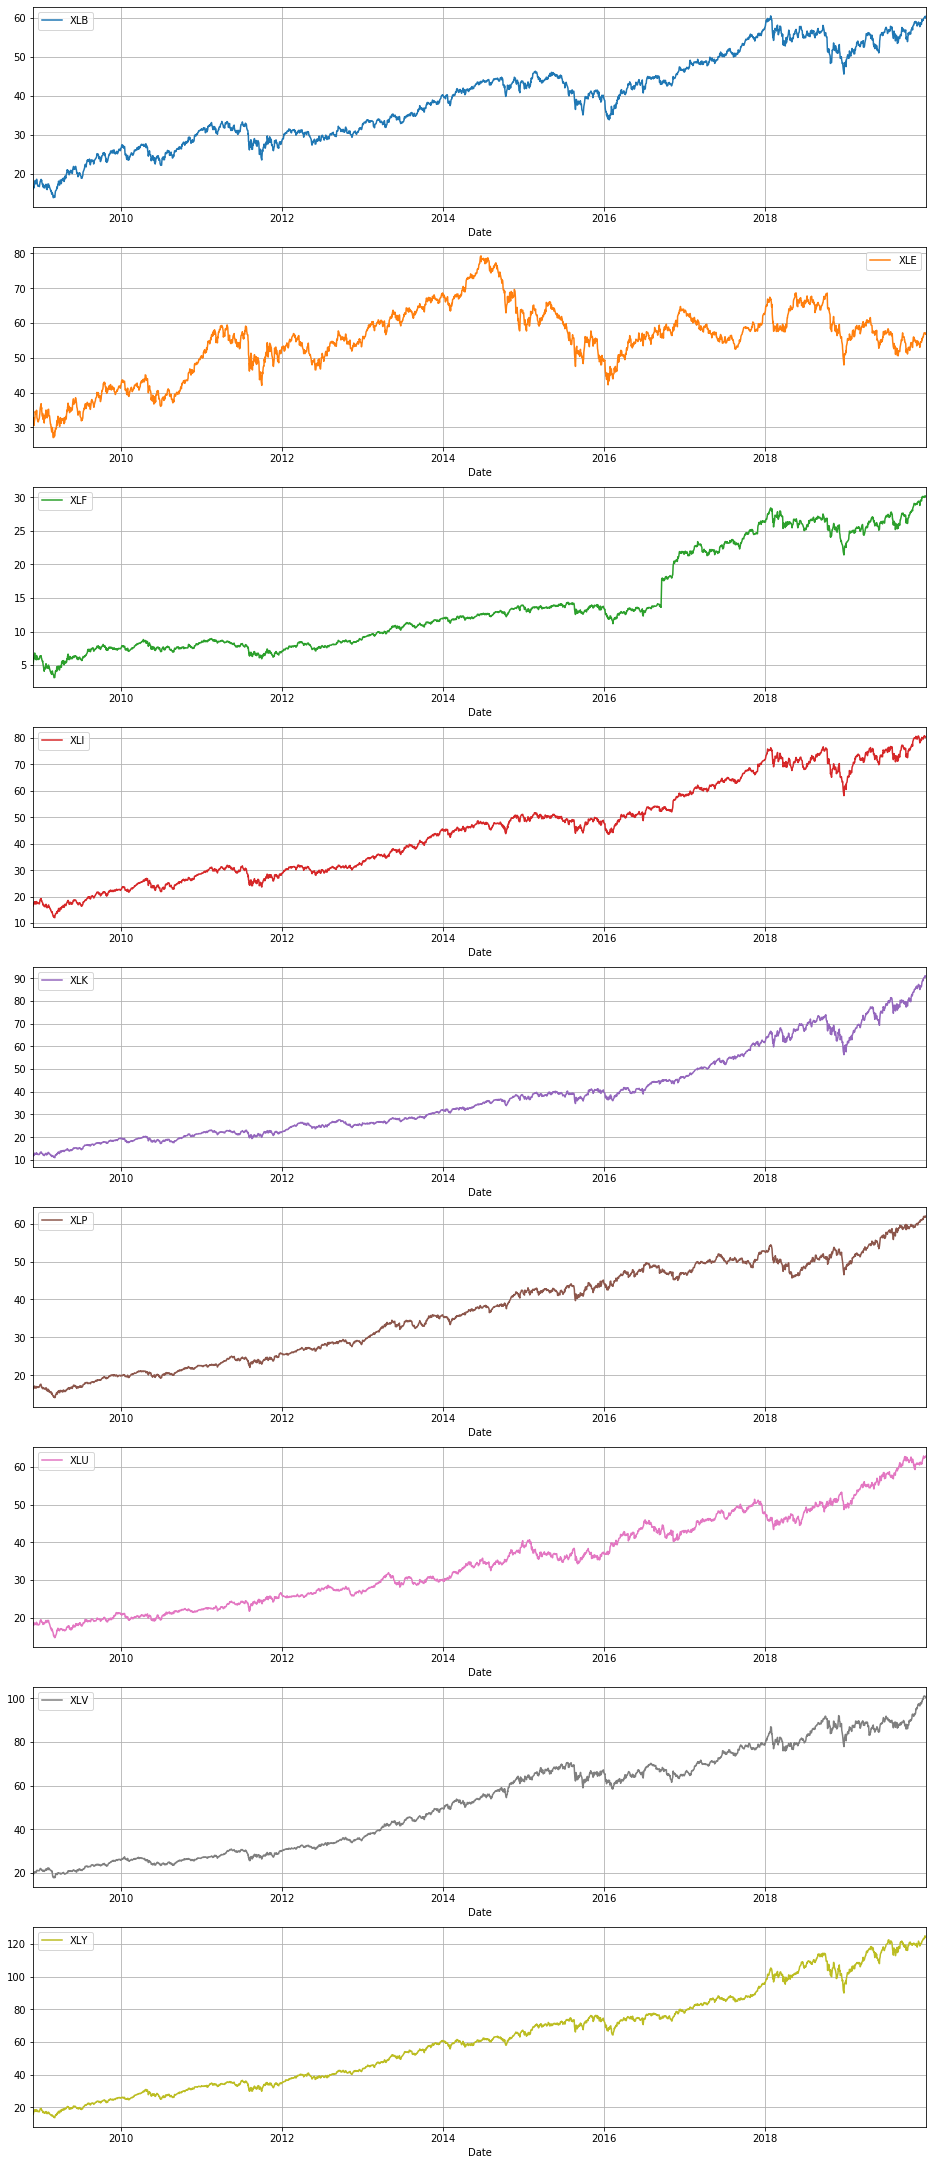

In [5]:
data.plot(figsize=(16, 39), subplots=True, sharex=False, grid=True);

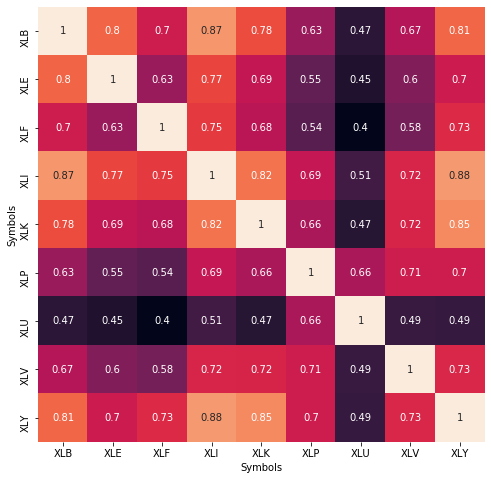

In [6]:
# Correlation Heatmap
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(8,8))
# plot the heatmap
sns.heatmap(returns.corr(), 
        xticklabels=Sigma.columns,
        yticklabels=Sigma.columns, annot=True, cbar=False);

In [7]:
# Eigen Value Check
eigenvalues = LA.eig(Sigma)
print(np.diag(Sigma).min() >= 0)
print(eigenvalues)

True
(array([1.02388370e-03, 1.16142623e-04, 8.01945475e-05, 5.98799899e-05,
       3.51522685e-05, 2.93244030e-05, 2.11032815e-05, 1.47217871e-05,
       1.66051716e-05]), array([[ 3.80659618e-01, -1.95560199e-01, -2.15421478e-01,
        -1.23577990e-01, -5.17573996e-01, -5.27080635e-01,
         3.69059744e-01,  1.76934529e-01,  2.04862811e-01],
       [ 3.91393641e-01, -3.33509359e-01, -6.65393352e-01,
         3.49217239e-01,  3.41736452e-01,  2.05927998e-01,
        -1.01944525e-01,  8.23774119e-03,  3.50833565e-02],
       [ 5.00133617e-01,  8.40387057e-01, -2.55840298e-03,
         1.82018211e-01,  7.28402660e-02, -6.81806839e-03,
         5.66092206e-02,  8.05349007e-04,  4.38331191e-02],
       [ 3.58324110e-01, -9.85058243e-02,  3.25217879e-02,
        -1.82597142e-01, -2.42019563e-01, -1.14164763e-01,
        -4.06407227e-01, -5.65934165e-01, -5.20043918e-01],
       [ 3.14020932e-01, -1.41616480e-01,  1.74003729e-01,
        -3.89996707e-01,  4.59401205e-02,  5.83310033e-0

### Eigen values are all positive and the minimum diagonal of the covariance matrix is positive. We are fit to continue

In [8]:
#Set the number of iterations to 10000 and define an array to hold the simulation results; initially set to all zeros
num_iterations = 100000
simulation_res = np.zeros((4+len(stock)-1,num_iterations))

In [9]:
for i in range(num_iterations):
#Select random weights and normalize to set the sum to 1
        weights = np.array(np.random.random(9))
        weights /= np.sum(weights)
#Calculate the return and standard deviation for every step
        portfolio_return = np.sum(mean_returns * weights)
        portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(Sigma, weights)))
#Store all the results in a defined array
        simulation_res[0,i] = portfolio_return
        simulation_res[1,i] = portfolio_std_dev
#Calculate Sharpe ratio and store it in the array
        simulation_res[2,i] = simulation_res[0,i] / simulation_res[1,i]
#Save the weights in the array
        for j in range(len(weights)):
                simulation_res[j+3,i] = weights[j]

In [10]:
sim_frame = pd.DataFrame(simulation_res.T,columns=['ret','stdev','sharpe']+data.columns.to_list())
print (sim_frame.head (5))
print (sim_frame.tail (5))

        ret     stdev    sharpe       XLB       XLE       XLF       XLI  \
0  0.000625  0.009459  0.066026  0.045346  0.072896  0.087899  0.101859   
1  0.000662  0.010343  0.064010  0.150289  0.013763  0.081410  0.192072   
2  0.000638  0.010135  0.062923  0.069971  0.058300  0.151348  0.134571   
3  0.000593  0.009832  0.060286  0.010481  0.114670  0.112557  0.236350   
4  0.000608  0.010229  0.059417  0.222984  0.115835  0.022660  0.097647   

        XLK       XLP       XLU       XLV       XLY  
0  0.204643  0.189739  0.139618  0.101930  0.056071  
1  0.080672  0.082722  0.044027  0.189493  0.165551  
2  0.014212  0.168001  0.072388  0.167991  0.163217  
3  0.118181  0.126364  0.237721  0.017204  0.026472  
4  0.097032  0.019702  0.107481  0.199244  0.117416  
            ret     stdev    sharpe       XLB       XLE       XLF       XLI  \
99995  0.000667  0.011039  0.060444  0.130462  0.074274  0.160143  0.133602   
99996  0.000630  0.010428  0.060384  0.178017  0.118849  0.106289  

In [11]:
#Spot the position of the portfolio with highest Sharpe Ratio
max_sharpe = sim_frame.iloc[sim_frame['sharpe'].idxmax()]
#Spot the position of the portfolio with minimum Standard Deviation
min_std = sim_frame.iloc[sim_frame['stdev'].idxmin()]
print ("The portfolio for max Sharpe Ratio:\n", max_sharpe)
print ("The portfolio for min risk:\n", min_std)

The portfolio for max Sharpe Ratio:
 ret       0.000628
stdev     0.008331
sharpe    0.075368
XLB       0.003203
XLE       0.004571
XLF       0.009899
XLI       0.005186
XLK       0.262613
XLP       0.168572
XLU       0.254456
XLV       0.266721
XLY       0.024778
Name: 5748, dtype: float64
The portfolio for min risk:
 ret       0.000582
stdev     0.008149
sharpe    0.071392
XLB       0.036236
XLE       0.026886
XLF       0.009630
XLI       0.004946
XLK       0.033071
XLP       0.225811
XLU       0.244060
XLV       0.355626
XLY       0.063735
Name: 21453, dtype: float64


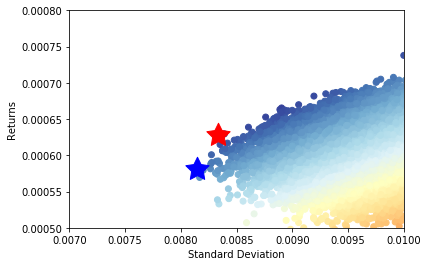

In [53]:
#Create a scatter plot coloured by various Sharpe Ratios with standard deviation on the x-axis and returns on the y-axis
plt.scatter(sim_frame.stdev,sim_frame.ret,c=sim_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')
plt.ylim(0.0004,0.0008)
plt.xlim(0.007,0.01)
#Plot a red star to highlight position of the portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe[1],max_sharpe[0],marker=(5,1,0),color='r',s=600)
#Plot a blue star to highlight position of the portfolio with minimum Variance
plt.scatter(min_std[1],min_std[0],marker=(5,1,0),color='b',s=600)
plt.show()

In [13]:
# STEP 1 input data
C = np.matrix(returns.corr())
mu=np.matrix(mean_returns).T
x = np.matrix(max_sharpe.drop(['ret','stdev','sharpe'])).T
vol=returns.std()
Sigma =np.matrix(Sigma)
alpha = 0.99
benchmark_weights = np.matrix([1/len(data.columns)]*len(data.columns)).T

# Black Litterman Optimization

In [14]:
estimates = pd.read_csv('D:/CQF Final Project/BLEstimates.csv', index_col = [0])
estimates = np.matrix(estimates[:9])

In [15]:
w = benchmark_weights
delta = 2.5
tau = 0.05

In [16]:
r_eq = delta * np.dot(np.matrix(Sigma), w)

In [17]:
P = np.array(estimates.T) # 2x10 matrix (2: number of views, 10: number of assets)
Q = np.array([[0.05],[0.03]]) # 2-vector
Omega = np.array([
        [0.001065383332,0],
        [0,0.0008517381]])

In [18]:
# Black-Litterman master equation
# Π′ = Π + τΣPT (PτΣPT + Ω)-1 (Q−PΠ)
#
# Mixing Investor’s View with the Equilibrium Returns
r_posterior = r_eq + np.dot( np.dot( tau*np.dot(Sigma,P.T), np.linalg.inv(tau*np.dot(np.dot(P,Sigma),P.T)+Omega)), (Q-np.dot(P,r_eq)))

# Along with the returns, variance-covariance matrix can be updated as follows:
# Σ′ = Σ + τΣ -τΣPT (PτΣPT + Ω)-1PτΣ
Sigma_posterior = Sigma + tau*Sigma - tau*np.dot( np.dot( np.dot(Sigma,P.T), np.linalg.inv(tau*np.dot(np.dot(P,Sigma),P.T)+Omega)), tau*np.dot(P,Sigma))

In [19]:
w_posterior = np.asarray(np.dot(np.linalg.inv(delta*Sigma_posterior), r_posterior))
w = np.asarray(w)

In [20]:
BL_weights = w_posterior
mu_BL = BL_weights.T*r_posterior
#mu_org = w*mu
print('Expected Return with Black Litterman Optimization:', round(np.asscalar(mu_BL),5))
print('Expected Return with original weights:',round(np.asscalar(w.T*r_posterior),5))

Expected Return with Black Litterman Optimization: 0.00182
Expected Return with original weights: 0.00067


In [21]:
w_posterior.reshape(9)
print(type(np.asarray(w_posterior)))
print(np.asarray(w_posterior))

<class 'numpy.ndarray'>
[[ 0.96119046]
 [-0.17181975]
 [ 0.53350528]
 [ 0.20846455]
 [ 0.96119046]
 [-0.10240979]
 [ 0.22557196]
 [ 0.12292751]
 [-0.58827954]]


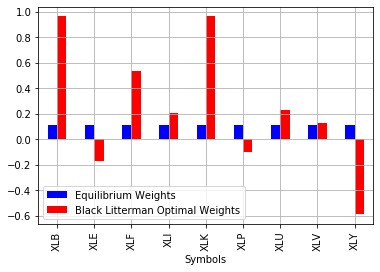

In [22]:
BL_weights_df = pd.DataFrame([w.reshape(9),w_posterior.reshape(9)],
                  columns=data.columns,
                  index=['Equilibrium Weights','Black Litterman Optimal Weights'])
BL_weights_df.T.plot(kind='bar', color='br', grid=True);

In [23]:
black_litterman_df = pd.DataFrame([w.reshape(9),w_posterior.reshape(9)],
                  columns=data.columns,
                  index=['Equilibrium Weights','Black Litterman Optimal Weights']).T

black_litterman_df['Difference'] = black_litterman_df['Black Litterman Optimal Weights']- black_litterman_df['Equilibrium Weights']
black_litterman_df['Equilibrium Returns'] = r_eq
black_litterman_df['Black-Litterman Expected Return'] = r_posterior
black_litterman_df['Return Difference'] = black_litterman_df['Black-Litterman Expected Return']-black_litterman_df['Equilibrium Returns']
print(black_litterman_df)

         Equilibrium Weights  Black Litterman Optimal Weights  Difference  \
Symbols                                                                     
XLB                 0.111111                         0.961190    0.850079   
XLE                 0.111111                        -0.171820   -0.282931   
XLF                 0.111111                         0.533505    0.422394   
XLI                 0.111111                         0.208465    0.097353   
XLK                 0.111111                         0.961190    0.850079   
XLP                 0.111111                        -0.102410   -0.213521   
XLU                 0.111111                         0.225572    0.114461   
XLV                 0.111111                         0.122928    0.011816   
XLY                 0.111111                        -0.588280   -0.699391   

         Equilibrium Returns  Black-Litterman Expected Return  \
Symbols                                                         
XLB                 0.

In [24]:
# compute portfolio variance

var_p = x.T*np.matrix(Sigma)*x
vol_p = math.sqrt(var_p)

# Risk Budgeting

In [25]:
def portfolio_risk(w, mu, Sigma, alpha):
    """Calculates Value-at-Risk of a Portfolio"""
    
    VAR = -w.T*mu + norm.ppf(alpha)*math.sqrt(w.T*Sigma*w)
    ES = -w.T*mu + (math.sqrt(w.T*Sigma*w))/(1-alpha)*norm.pdf(norm.ppf(alpha))
    variance = w.T*np.matrix(Sigma)*w
    vol = math.sqrt(variance.item())
    
    return(VAR.item(), ES.item(), vol)

In [26]:
def risk_contribution_metrics(w, mu, Sigma, alpha):
    """Compute contribution to risk metric by security"""
    
    # compute VAR RC
    VAR = -np.array(w)*np.array(mu) + norm.ppf(alpha)*np.array(w)*np.array(Sigma*w/math.sqrt(w.T*Sigma*w))

    # compute ES RC
    ES = -np.array(w)*np.array(mu) + norm.pdf(norm.ppf(alpha))*np.array(w)*np.array((Sigma*w)/(math.sqrt(w.T*Sigma*w)*(1-alpha)))
    
    # compute STD RC
    STD = -np.array(w)*np.array(mu) + np.array(w)*np.array(Sigma*w/math.sqrt(w.T*Sigma*w))
    
    VAR_list = [x[0] for x in VAR]
    ES_list = [x[0] for x in ES]
    STD_list = [x[0] for x in STD]
    
    
    return(VAR_list, ES_list, STD_list)

### Benchmark Risk Budgeting

In [27]:
w_benchmark = np.matrix(benchmark_weights)
mu_benchmark=np.matrix(mean_returns).T
benchmark_ER = w_benchmark.T*mu_benchmark

In [28]:
benchmark_risk = portfolio_risk(w_benchmark, mu_benchmark, Sigma, alpha)

benchmark_risk = portfolio_risk(w_benchmark, mu_benchmark, Sigma, alpha)
benchmark_risk_contrib = risk_contribution_metrics(w_benchmark, mu_benchmark, Sigma, alpha)

benchmark_contrib_df = pd.DataFrame(index=stock)
benchmark_contrib_df['VaR'] = benchmark_risk_contrib[0]
benchmark_contrib_df['ES'] = benchmark_risk_contrib[1]
benchmark_contrib_df['STD'] = benchmark_risk_contrib[2]

In [29]:
print('Benchmark Expected Return: ',round(benchmark_ER.item(),4))
print('VaR for the Benchmark Portfolio is: ', round(benchmark_risk[0],4))
print('The Expected Shortfall for the Benchmark Portfolio is: ', round(benchmark_risk[1],4))
print('Standard Deviation for the Benchmark Portfolio is: ', round(benchmark_risk[2],4))
print('\n')
print(benchmark_contrib_df)

Benchmark Expected Return:  0.0006
VaR for the Benchmark Portfolio is:  0.0231
The Expected Shortfall for the Benchmark Portfolio is:  0.0266
Standard Deviation for the Benchmark Portfolio is:  0.0102


          VaR        ES       STD
XLY  0.003068  0.003524  0.001283
XLP  0.003170  0.003637  0.001342
XLE  0.003879  0.004457  0.001617
XLF  0.002890  0.003322  0.001202
XLV  0.002532  0.002914  0.001038
XLI  0.001523  0.001753  0.000622
XLB  0.001429  0.001645  0.000583
XLK  0.001960  0.002256  0.000802
XLU  0.002660  0.003060  0.001092


### Max Sharpe Ratio Risk Budgeting

In [30]:
w_sharpe = np.matrix(max_sharpe.drop(['ret','stdev','sharpe'])).T
mu_sharpe = np.matrix(mean_returns).T
sharpe_ER = w_sharpe.T*mu_sharpe

In [31]:
max_sharpe_risk = portfolio_risk(w_sharpe, mu_sharpe, Sigma, alpha)
sharpe_risk_contrib = risk_contribution_metrics(w_sharpe, mu, Sigma, alpha)

sharpe_contrib_df = pd.DataFrame(index=stock)
sharpe_contrib_df['VaR'] = sharpe_risk_contrib[0]
sharpe_contrib_df['ES'] = sharpe_risk_contrib[1]
sharpe_contrib_df['STD'] = sharpe_risk_contrib[2]

In [32]:
print('Max Sharpe Portfolio Expected Return: ',round(sharpe_ER.item(),4))
print('VaR for the Max Sharpe Portfolio: ', round(max_sharpe_risk[0],4) )
print('The Expected Shortfall for Max Sharpe Portfolio: ', round(max_sharpe_risk[1],4))
print('Standard Deviation for the Max Sharpe Portfolio: ', round(max_sharpe_risk[2],4))
print('\n')
print(sharpe_contrib_df)

Max Sharpe Portfolio Expected Return:  0.0006
VaR for the Max Sharpe Portfolio:  0.0188
The Expected Shortfall for Max Sharpe Portfolio:  0.0216
Standard Deviation for the Max Sharpe Portfolio:  0.0083


          VaR        ES       STD
XLY  0.000077  0.000088  0.000032
XLP  0.000110  0.000126  0.000046
XLE  0.000285  0.000327  0.000118
XLF  0.000121  0.000139  0.000050
XLV  0.005988  0.006891  0.002454
XLI  0.002528  0.002909  0.001038
XLB  0.003958  0.004552  0.001630
XLK  0.005135  0.005908  0.002109
XLU  0.000552  0.000635  0.000226


### Minimum Variance Portfolio Risk Budgeting

In [33]:
w_min = np.matrix(min_std.drop(['ret','stdev','sharpe'])).T
mu_min =np.matrix(mean_returns).T
min_ER = w_min.T*mu_min

In [34]:
min_risk = portfolio_risk(w_min, mu_min, Sigma, alpha)
min_risk_contrib = risk_contribution_metrics(w_min, mu_min, Sigma, alpha)

min_contrib_df = pd.DataFrame(index=stock)
min_contrib_df['VaR'] = min_risk[0]
min_contrib_df['ES'] = min_risk[1]
min_contrib_df['STD'] = min_risk[2]

In [35]:
print('Max Sharpe Portfolio Expected Return: ',round(min_ER.item(),4))
print('VaR for the Max Sharpe Portfolio: ', round(min_risk[0],4))
print('The Expected Shortfall for Max Sharpe Portfolio: ', round(min_risk[1],4))
print('Standard Deviation for the Max Sharpe Portfolio: ', round(min_risk[2],4))
print('\n')
print(min_contrib_df)

Max Sharpe Portfolio Expected Return:  0.0006
VaR for the Max Sharpe Portfolio:  0.0184
The Expected Shortfall for Max Sharpe Portfolio:  0.0211
Standard Deviation for the Max Sharpe Portfolio:  0.0081


          VaR        ES       STD
XLY  0.018376  0.021138  0.008149
XLP  0.018376  0.021138  0.008149
XLE  0.018376  0.021138  0.008149
XLF  0.018376  0.021138  0.008149
XLV  0.018376  0.021138  0.008149
XLI  0.018376  0.021138  0.008149
XLB  0.018376  0.021138  0.008149
XLK  0.018376  0.021138  0.008149
XLU  0.018376  0.021138  0.008149


### Black-Litterman Optimization Risk Budgeting

In [36]:
w_BL = np.matrix(w_posterior)
mu_BL=np.matrix(mean_returns).T
BL_ER = w_BL.T*mu_BL

In [37]:
BL_risk = portfolio_risk(w_BL, mu_BL, Sigma, alpha)
BL_risk_contrib = risk_contribution_metrics(w_BL, mu_BL, Sigma, alpha)

BL_contrib_df = pd.DataFrame(index=stock)
BL_contrib_df['VaR'] = BL_risk_contrib[0]
BL_contrib_df['ES'] = BL_risk_contrib[1]
BL_contrib_df['STD'] = BL_risk_contrib[2]

In [38]:
print('Black-Litterman Portfolio Expected Return: ',round(BL_ER.item(),4))
print('VaR for the Black-Litterman Portfolio: ', round(BL_risk[0],4) )
print('The Expected Shortfall for Black-Litterman Portfolio: ', round(BL_risk[1],4))
print('Standard Deviation for the Black-Litterman Portfolio: ', round(BL_risk[2],4))
print('\n')
print(BL_contrib_df)

Black-Litterman Portfolio Expected Return:  0.0015
VaR for the Black-Litterman Portfolio:  0.0598
The Expected Shortfall for Black-Litterman Portfolio:  0.0688
Standard Deviation for the Black-Litterman Portfolio:  0.0264


          VaR        ES       STD
XLY  0.027047  0.031065  0.011318
XLP -0.004426 -0.005078 -0.001871
XLE  0.019387  0.022273  0.008092
XLF  0.005201  0.005978  0.002159
XLV  0.022152  0.025492  0.009083
XLI -0.001199 -0.001381 -0.000486
XLB  0.002497  0.002877  0.001010
XLK  0.001964  0.002262  0.000799
XLU -0.012777 -0.014708 -0.005220


# Results Analysis

In [39]:
weights_table = pd.DataFrame(benchmark_weights, index=stock)
weights_table['Max Sharpe'] = np.asarray(max_sharpe[3:13])
weights_table['Min Variance'] = np.asarray(min_std[3:13])
weights_table['Black-Litterman'] = np.asarray(w_posterior)
weights_table.columns=['Benchmark', 'Max Sharpe', 'Min Variance', 'Black-Litterman']

In [40]:
weights_table

,Benchmark,Max Sharpe,Min Variance,Black-Litterman
XLY,0.111111,0.003203,0.036236,0.961190
XLP,0.111111,0.004571,0.026886,-0.171820
XLE,0.111111,0.009899,0.009630,0.533505
XLF,0.111111,0.005186,0.004946,0.208465
XLV,0.111111,0.262613,0.033071,0.961190
XLI,0.111111,0.168572,0.225811,-0.102410
XLB,0.111111,0.254456,0.244060,0.225572
XLK,0.111111,0.266721,0.355626,0.122928
XLU,0.111111,0.024778,0.063735,-0.588280


In [41]:
Benchmark_Port = [benchmark_ER.item(), benchmark_risk[0], benchmark_risk[1], benchmark_risk[2]]
Sharpe_Port = [sharpe_ER.item(), max_sharpe_risk[0], max_sharpe_risk[1], max_sharpe_risk[2]]
Min_Port = [min_ER.item(), min_risk[0], min_risk[1], min_risk[2]]
BL_Port = [BL_ER.item(), BL_risk[0], BL_risk[1], BL_risk[2]]

In [42]:
portfolios = pd.DataFrame(Benchmark_Port, index = ['Expected Return', 'Standard Deviation', 'VaR', 'Expected Shortfall'])
portfolios['Sharpe'] = np.asarray(Sharpe_Port)
portfolios['Min'] = np.asarray(Min_Port)
portfolios['BL'] = np.asarray(BL_Port)

In [43]:
portfolios.columns = ['Benchmark', 'Max Sharpe', 'Min Variance', 'Black-Litterman']

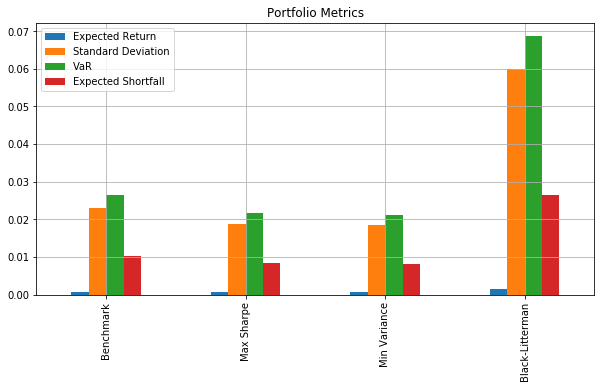

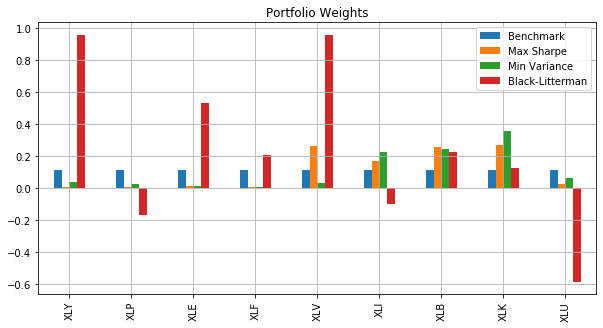

In [44]:
portfolios.T.plot(kind='bar', figsize=(10,5), grid=True, title='Portfolio Metrics');
weights_table.plot(kind='bar', figsize=(10, 5), grid=True, title = 'Portfolio Weights');